In [1]:
# Importez des algorithmes de classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

Importation des données

In [3]:
# importer le jeu de donnée vin.csv
df = pd.read_csv(r"C:/Users/ELite/Downloads/architecture exemple base/data/vin.csv", sep=',',decimal='.')
df

,Unnamed: 0,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,Vin amer
1,1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,Vin amer
2,2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,Vin amer
3,3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,Vin amer
4,4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,Vin amer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,Vin sucré
174,174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,Vin sucré
175,175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,Vin sucré
176,176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,Vin sucré


### Effectuer une rapide analyse des variables en creant un DataFrame à partir du jeu de donnée

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    178 non-null    int64  
 1   alcohol                       178 non-null    float64
 2   malic_acid                    178 non-null    float64
 3   ash                           178 non-null    float64
 4   alcalinity_of_ash             178 non-null    float64
 5   magnesium                     178 non-null    float64
 6   total_phenols                 178 non-null    float64
 7   flavanoids                    178 non-null    float64
 8   nonflavanoid_phenols          178 non-null    float64
 9   proanthocyanins               178 non-null    float64
 10  color_intensity               178 non-null    float64
 11  hue                           178 non-null    float64
 12  od280/od315_of_diluted_wines  178 non-null    float64
 13  proli

In [7]:
# afficher la colonne "target" en distinguant le contenu
df['target'].value_counts()

target
Vin éuilibré    71
Vin amer        59
Vin sucré       48
Name: count, dtype: int64

In [8]:
# corriger "Vin éuilibré" par "Vin équilibré"
df['target'] = df['target'].replace('Vin éuilibré', 'Vin équilibré')
df['target'].value_counts()

target
Vin équilibré    71
Vin amer         59
Vin sucré        48
Name: count, dtype: int64

In [9]:
# afficher les null et les sans valeur
df.isnull().sum()


Unnamed: 0                      0
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [10]:
# supprimer la colonne "Unnamed: 0"
df = df.drop('Unnamed: 0', axis=1)

In [11]:
# encoder la "target" 0,1 et 2
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['target_encoded'] = le.fit_transform(df['target'])

# Count values for 'target' and 'target_encoded' separately
print(df['target'].value_counts())
print(df['target_encoded'].value_counts())

target
Vin équilibré    71
Vin amer         59
Vin sucré        48
Name: count, dtype: int64
target_encoded
2    71
0    59
1    48
Name: count, dtype: int64


# Visualisation de la donnée

# Analyse des valeurs abérantes

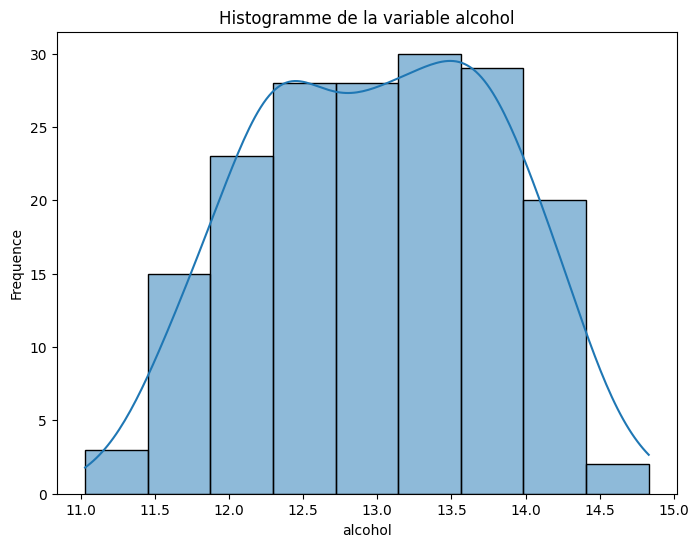

La variable alcohol n'est pas normalement distribuée (p-value=0.00034163202531285264)


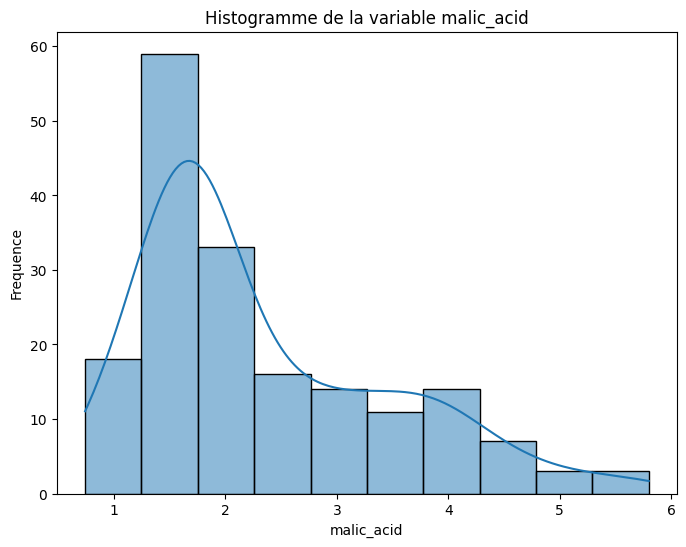

La variable malic_acid n'est pas normalement distribuée (p-value=3.1742168603714762e-06)


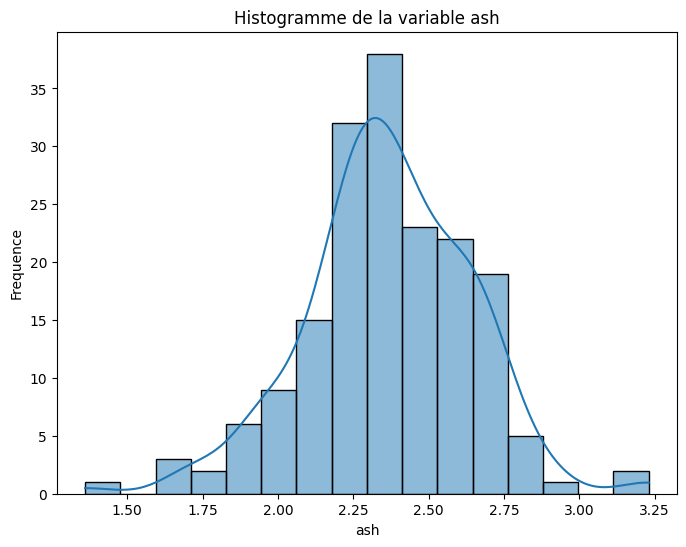

La variable ash n'est pas normalement distribuée (p-value=0.03631602067034469)


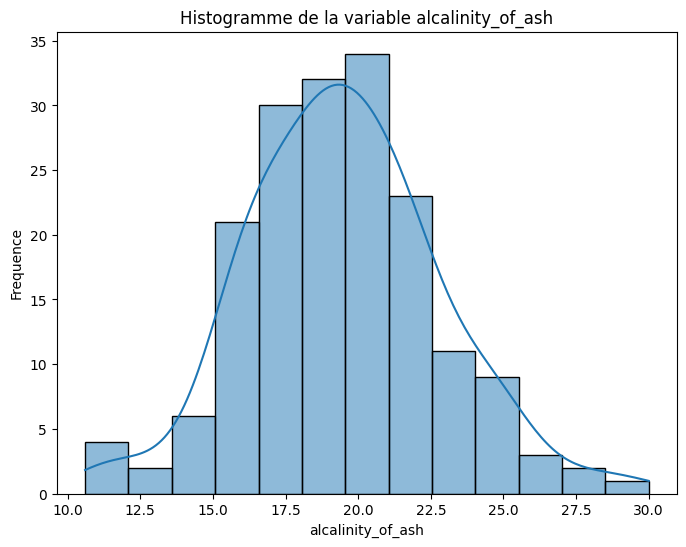

La variable alcalinity_of_ash est normalement distribuée (p-value=0.21004273588925534)


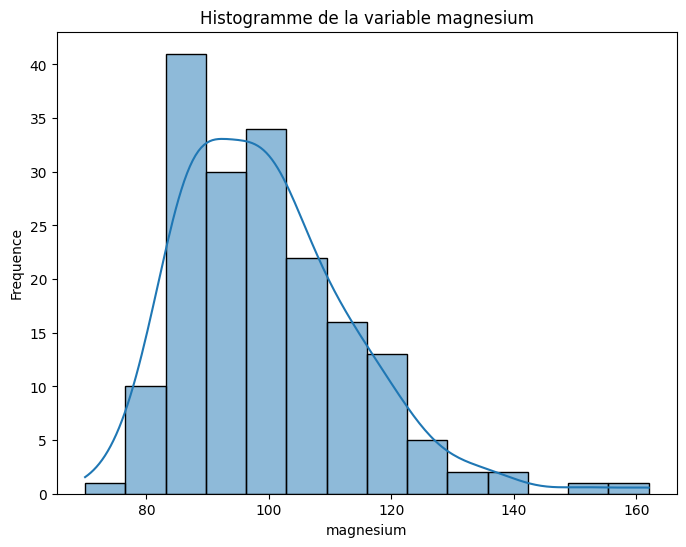

La variable magnesium n'est pas normalement distribuée (p-value=4.658884716268434e-09)


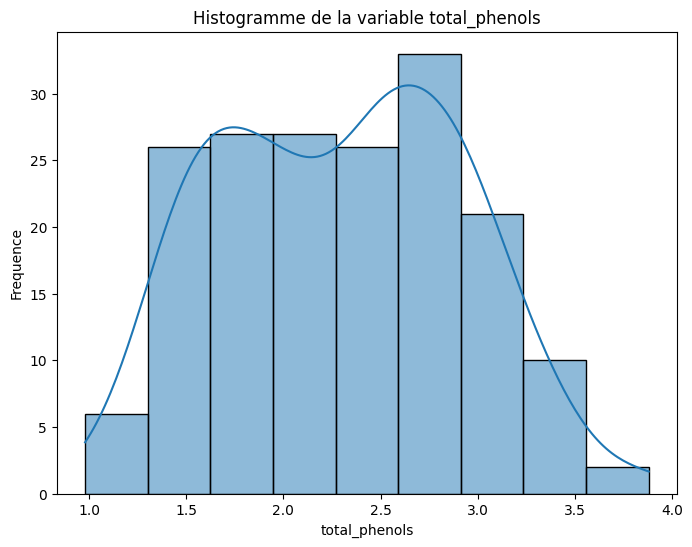

La variable total_phenols n'est pas normalement distribuée (p-value=0.0005556667174637149)


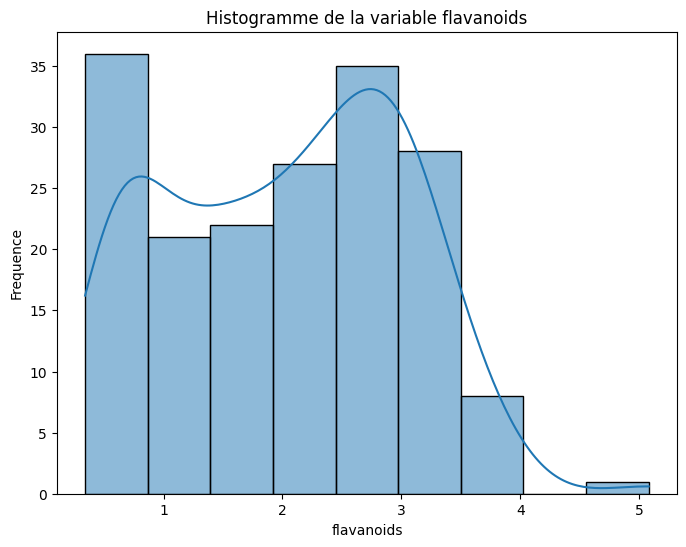

La variable flavanoids n'est pas normalement distribuée (p-value=0.00012693297763919295)


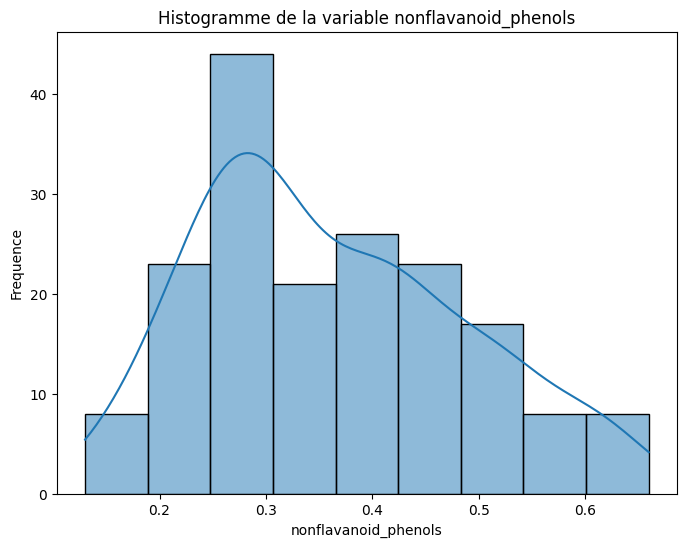

La variable nonflavanoid_phenols n'est pas normalement distribuée (p-value=0.0026647025727076653)


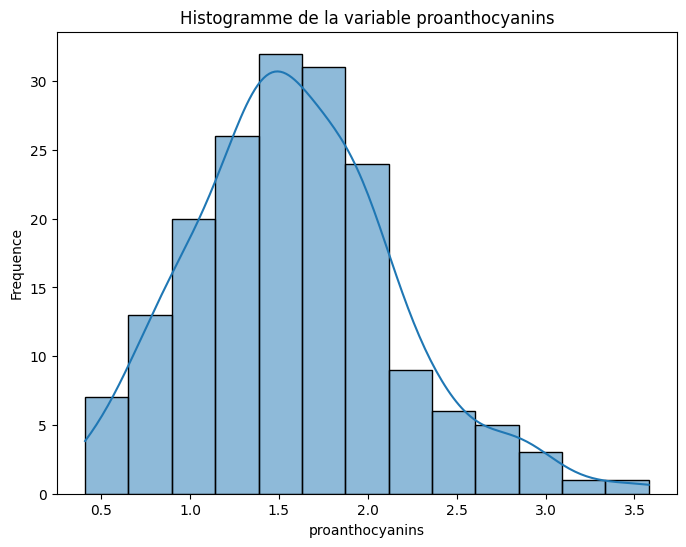

La variable proanthocyanins n'est pas normalement distribuée (p-value=0.008000813483971013)


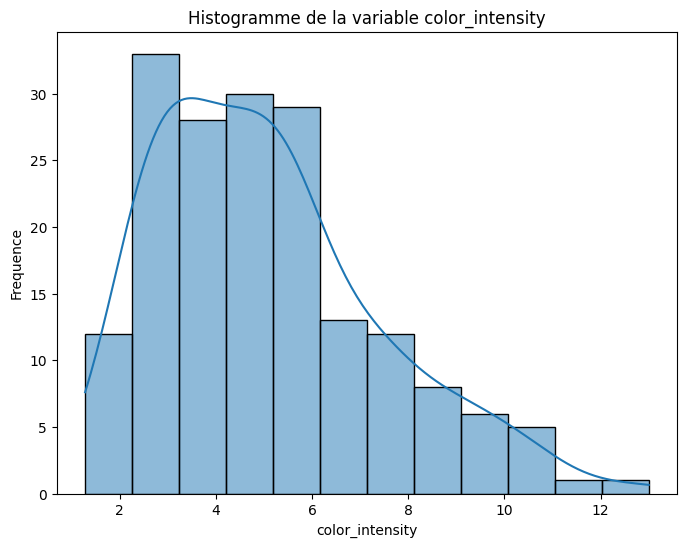

La variable color_intensity n'est pas normalement distribuée (p-value=5.31947611640046e-05)


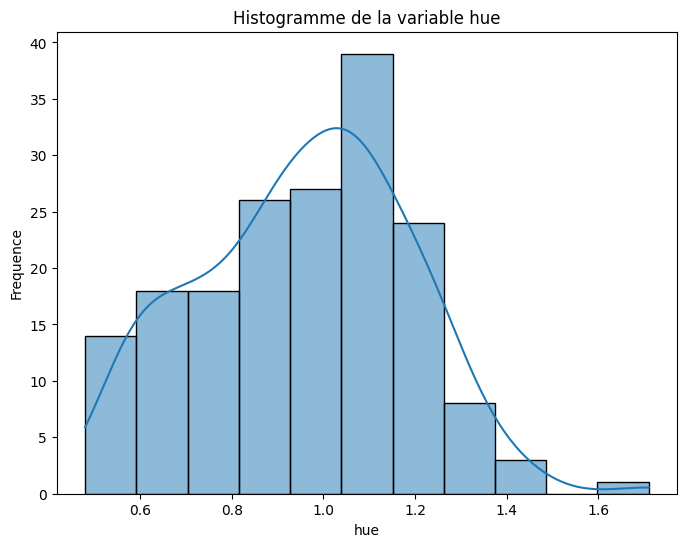

La variable hue est normalement distribuée (p-value=0.594729042205703)


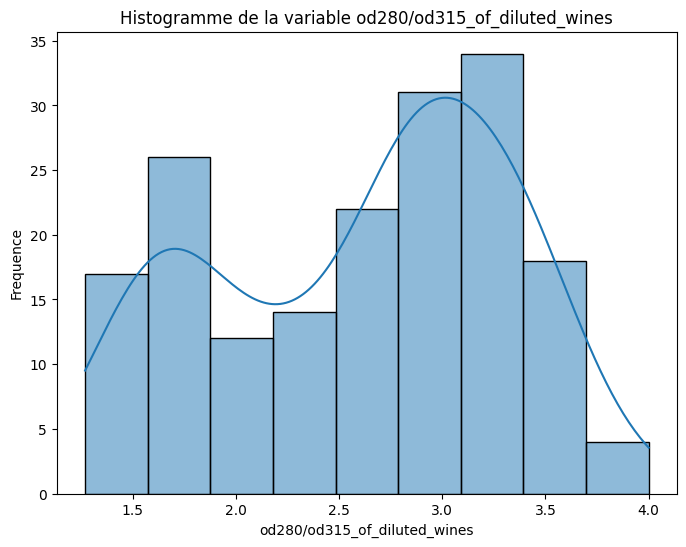

La variable od280/od315_of_diluted_wines n'est pas normalement distribuée (p-value=4.8789809118220485e-11)


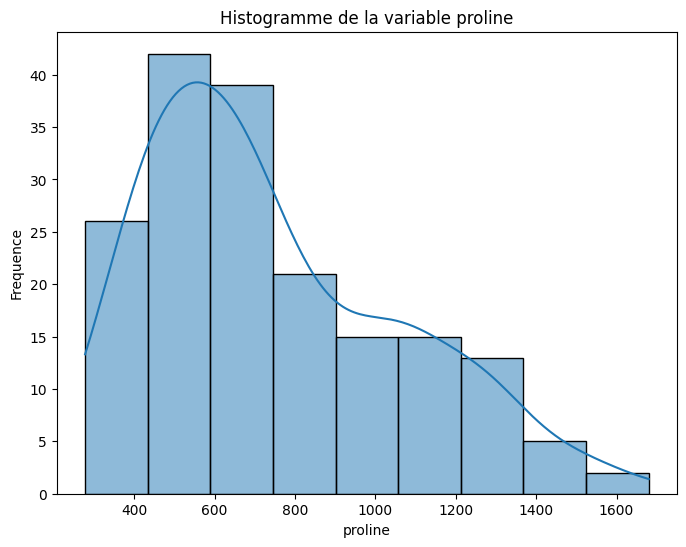

La variable proline n'est pas normalement distribuée (p-value=0.0004256462644890612)


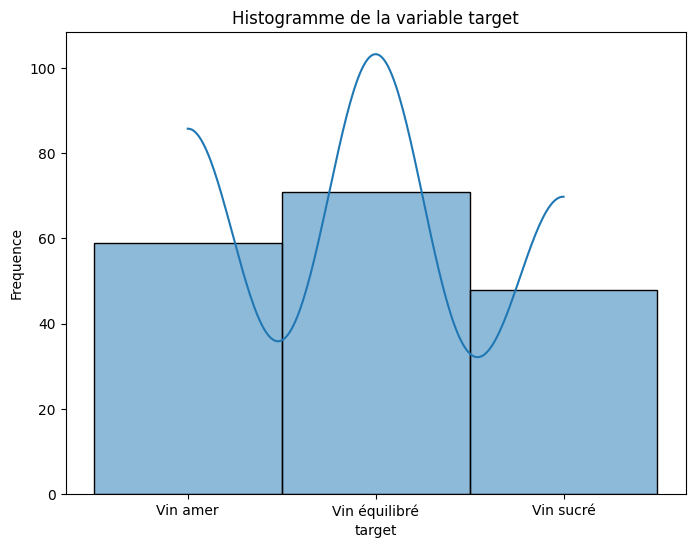

Skipping normality test for non-numeric column 'target'


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats # Import the stats module from scipy

for column in df.columns:
    # Skip the 'target' column to avoid the error
    if column == 'target_encoded':
        continue

    plt.figure(figsize=(8, 6))
    sns.histplot(data =df, x=column, kde=True)
    plt.title(f'Histogramme de la variable {column}')
    plt.xlabel(column)
    plt.ylabel('Frequence')
    plt.show()

    # test de normalité - Check if the column is numeric first
    if pd.api.types.is_numeric_dtype(df[column]):
        statistic, p_value = stats.normaltest(df[column])
        if p_value > 0.05:
            print(f'La variable {column} est normalement distribuée (p-value={p_value})')
        else:
            print(f'La variable {column} n\'est pas normalement distribuée (p-value={p_value})')
    else:
        print(f"Skipping normality test for non-numeric column '{column}'")

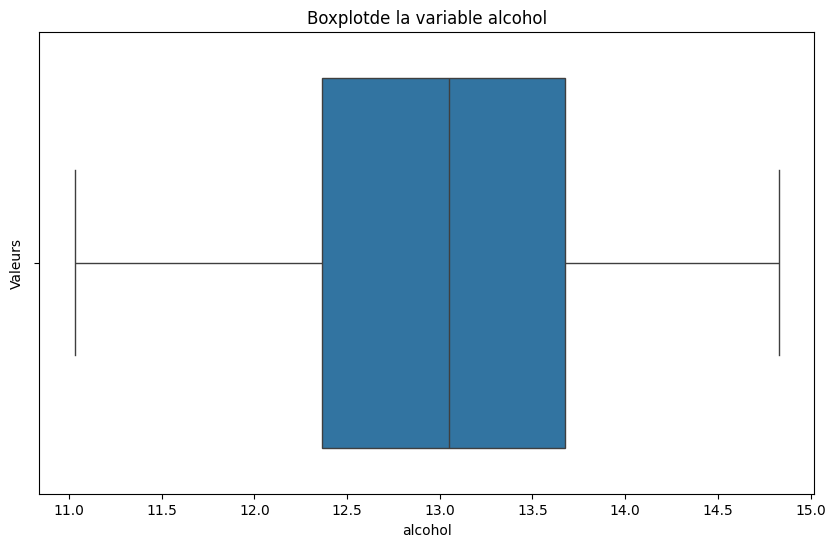

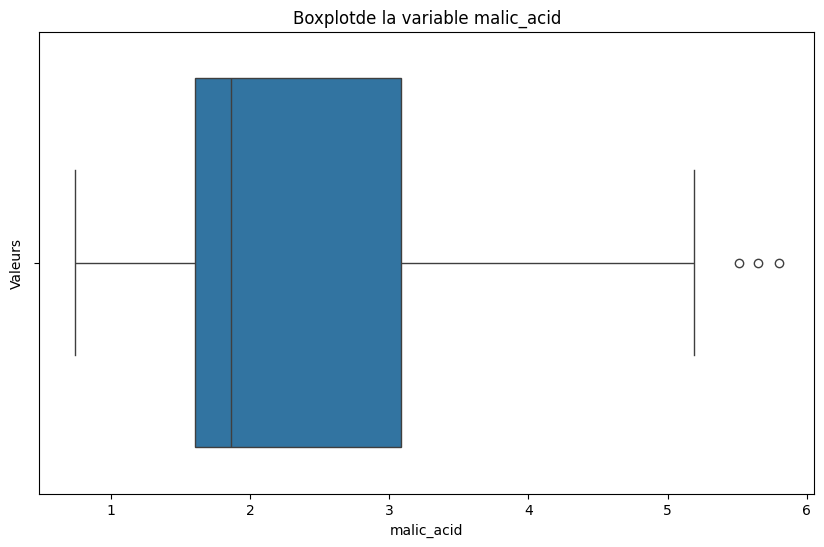

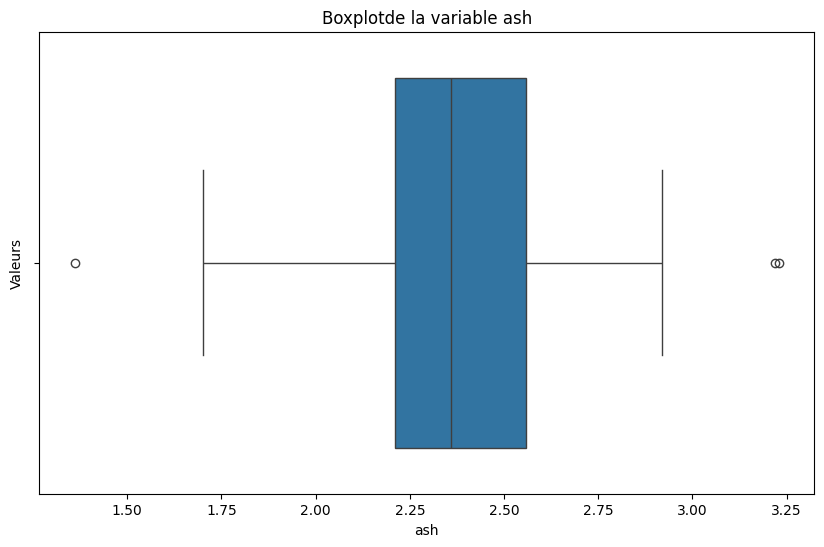

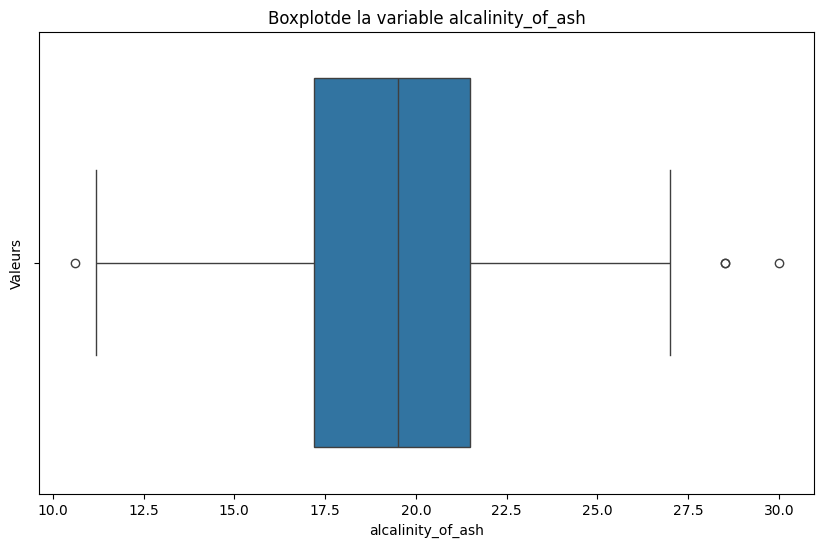

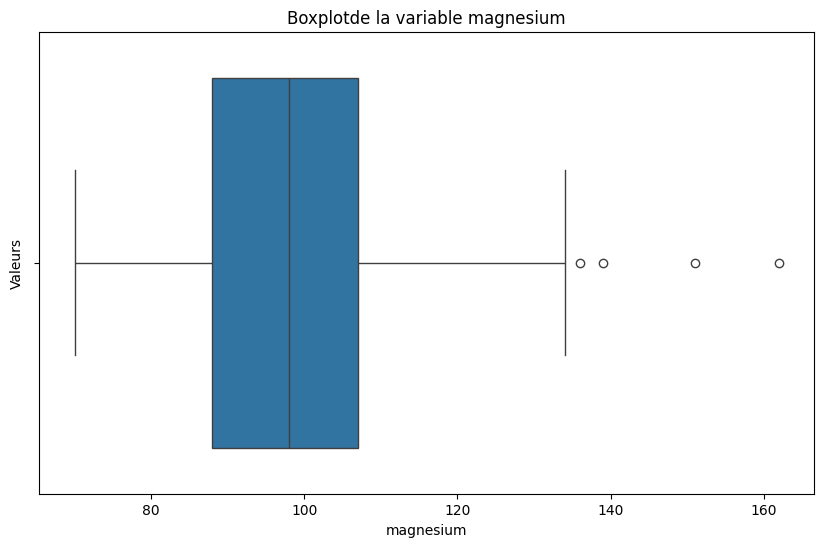

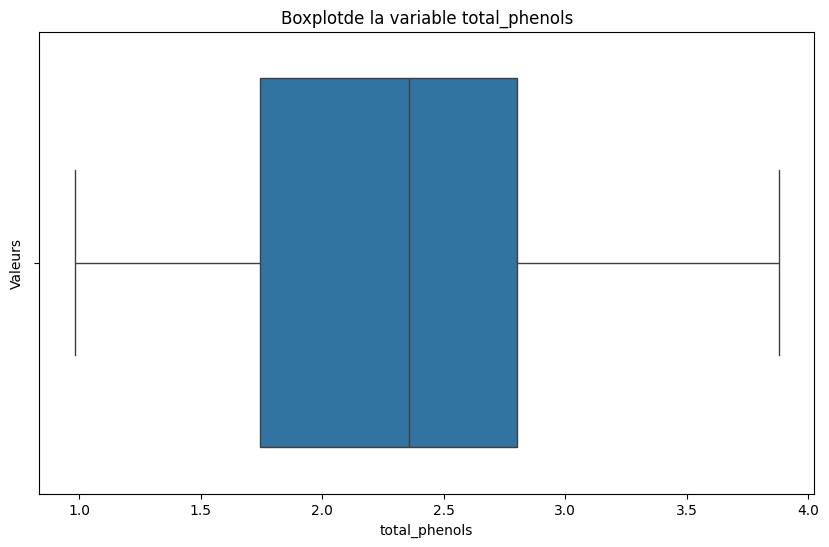

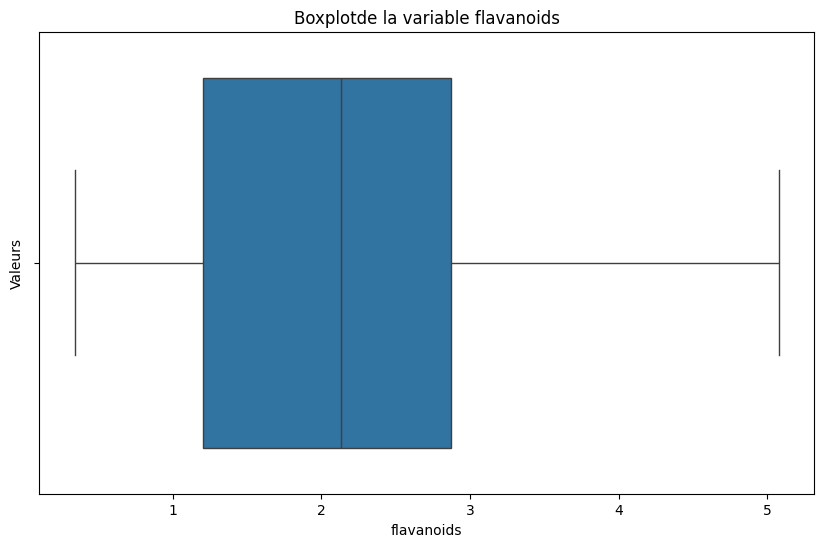

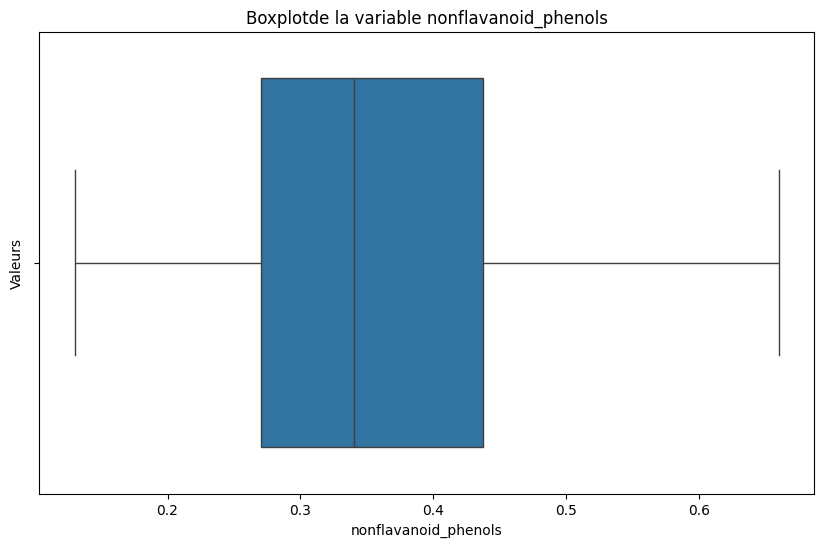

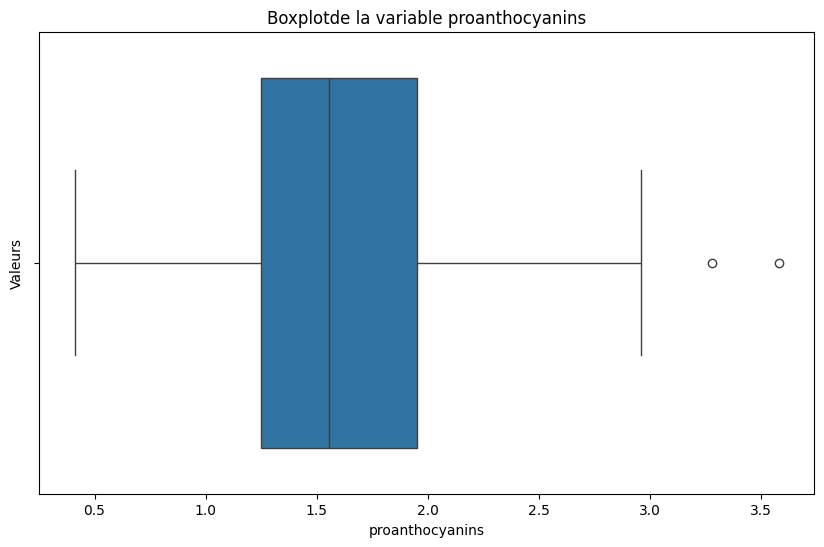

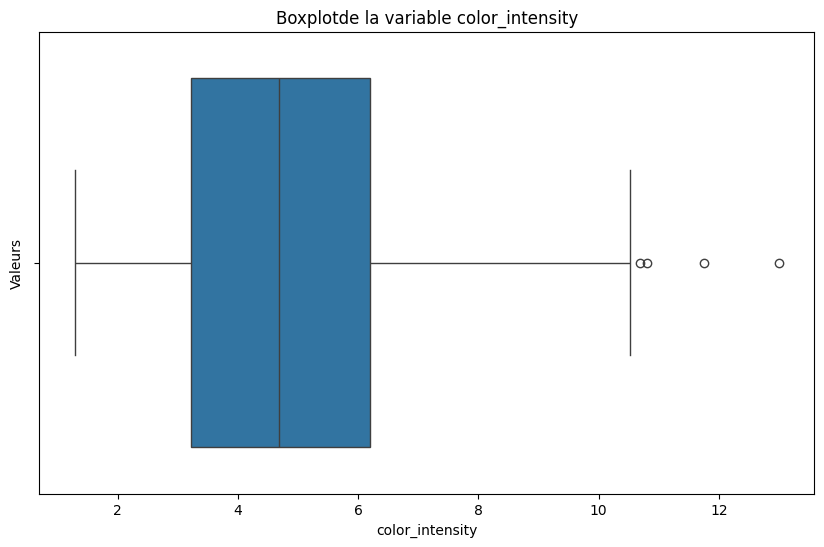

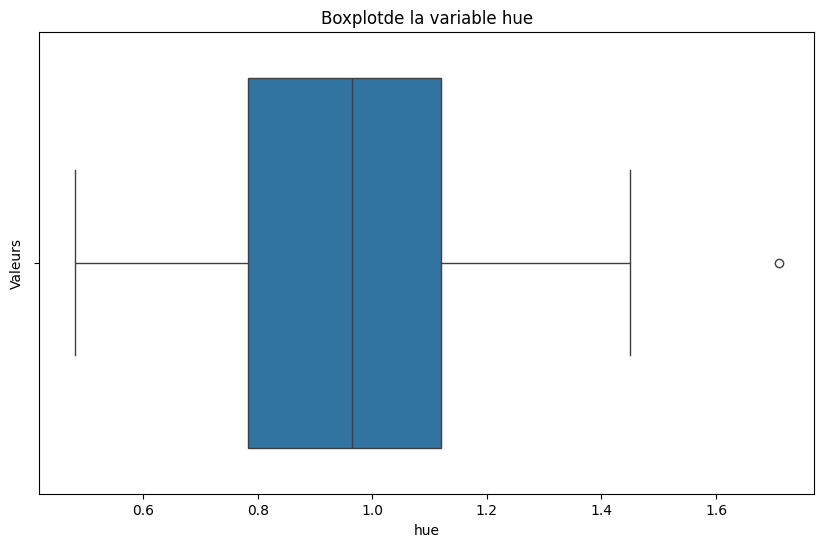

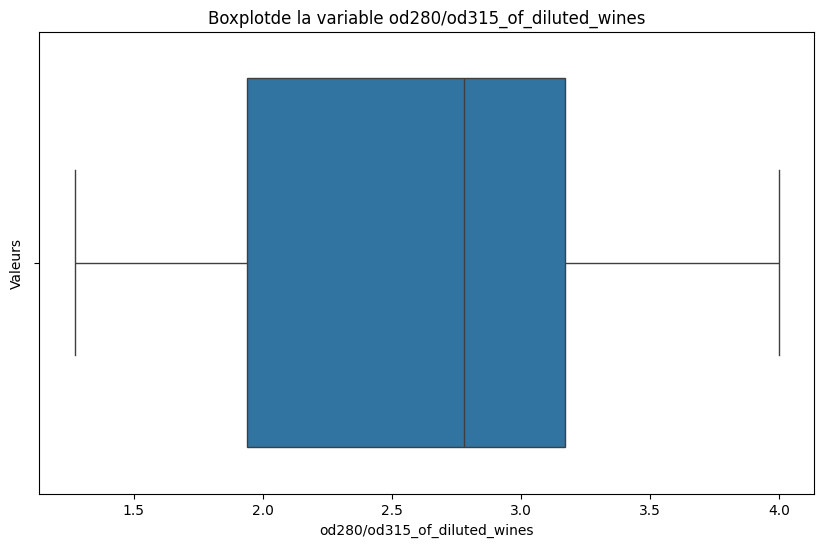

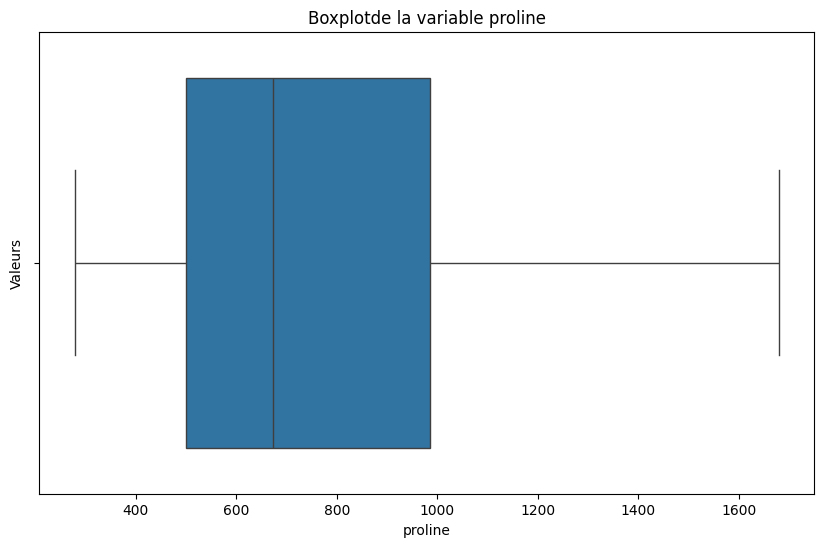

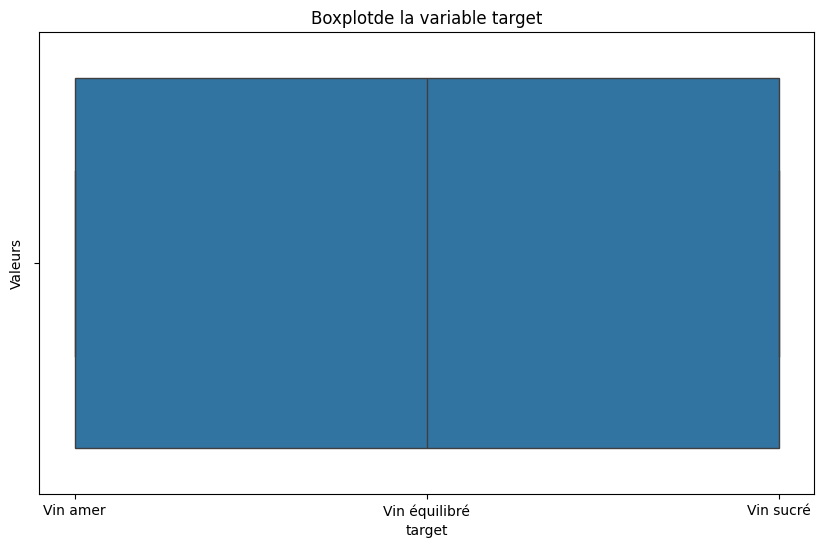

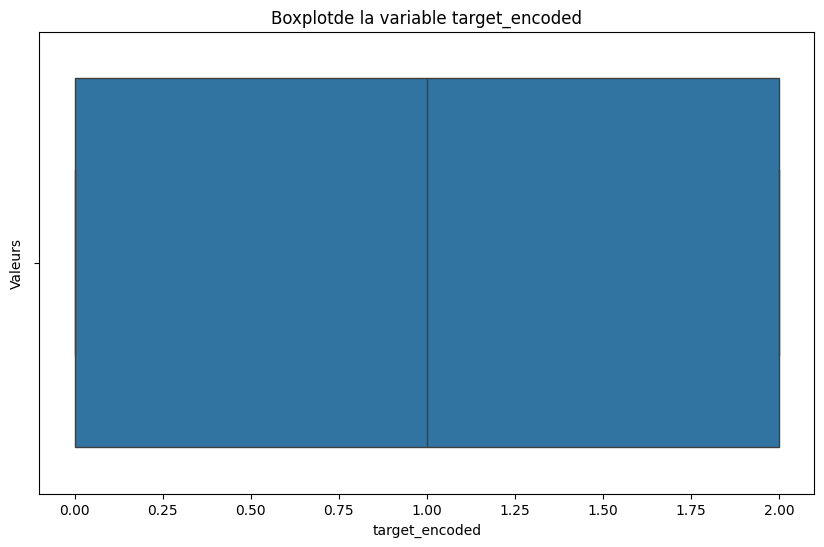

In [13]:
# Anlyse des valeurs abérantes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

for column in df.columns:
 plt.figure(figsize=(10, 6))
 sns.boxplot(data =df, x=column)
 plt.title(f'Boxplotde la variable {column}')
 plt.xlabel(column)
 plt.ylabel('Valeurs')
 plt.show()

# les valeurs abérantes

In [14]:
# En supposant que 'df' est votre DataFrame (assurez-vous qu'il est chargé)
# Inclure la colonne 'target' dans les statistiques sommaires si elle existe
if 'target_en' in df.columns:
    summary = df.describe(include='all')  # Inclure toutes les colonnes, y compris 'target'
else:
    summary = df.describe()

# Calculer l'IQR pour chaque colonne
Q1 = summary.loc['25%']
Q3 = summary.loc['75%']
IQR = Q3 - Q1

# Définir les limites des valeurs aberrantes
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Afficher les valeurs aberrantes pour chaque colonne
for column in df.columns:
    if column in lower_bound.index and column in upper_bound.index:  # Vérifier si la colonne existe dans les limites
        outliers = df[(df[column] < lower_bound[column]) | (df[column] > upper_bound[column])]
        if not outliers.empty:
            print(f"Valeurs aberrantes dans la colonne {column}:")
            print(outliers)
    else:
        print(f"La colonne '{column}' n'est pas présente dans les calculs des limites des valeurs aberrantes.")

Valeurs aberrantes dans la colonne malic_acid:
     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
123    13.05        5.80  2.13               21.5       86.0           2.62   
137    12.53        5.51  2.64               25.0       96.0           1.79   
173    13.71        5.65  2.45               20.5       95.0           1.68   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
123        2.65                  0.30             2.01              2.6  0.73   
137        0.60                  0.63             1.10              5.0  0.82   
173        0.61                  0.52             1.06              7.7  0.64   

     od280/od315_of_diluted_wines  proline         target  target_encoded  
123                          3.10    380.0  Vin équilibré               2  
137                          1.69    515.0      Vin sucré               1  
173                          1.74    740.0      Vin sucré               1  
Valeurs

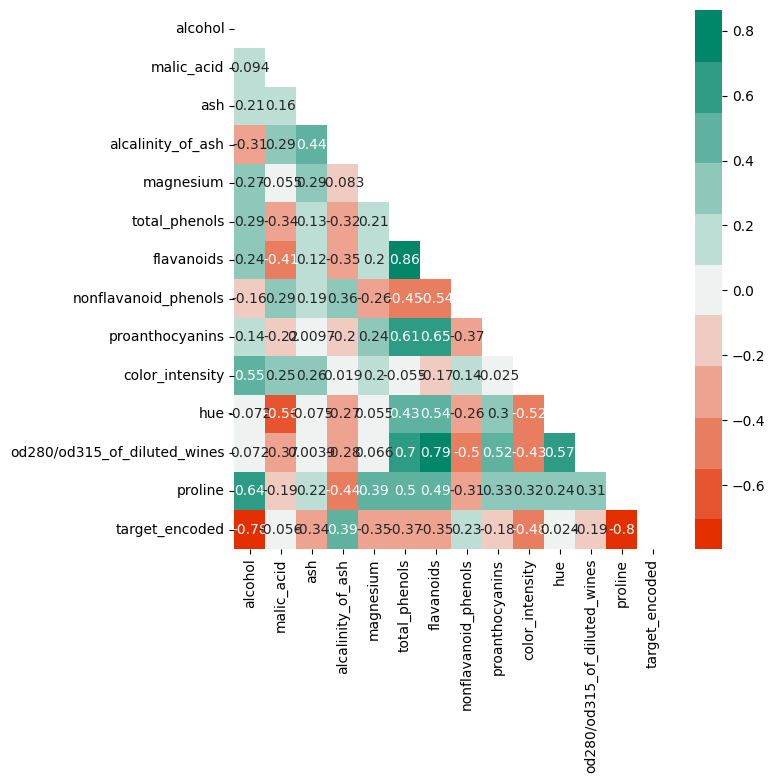

In [15]:
# Sélectionner uniquement les colonnes numériques
numeric_df = df.select_dtypes(include=np.number)

# Calculer la matrice de corrélation sur le DataFrame numérique
mask = np.triu(numeric_df.corr())
fig, ax = plt.subplots(figsize=(7, 7))
cmap = sns.diverging_palette(15, 160, n=11, s=100)

sns.heatmap(numeric_df.corr(),
            mask=mask,
            annot=True,
            cmap=cmap,
            center=0)

plt.show()

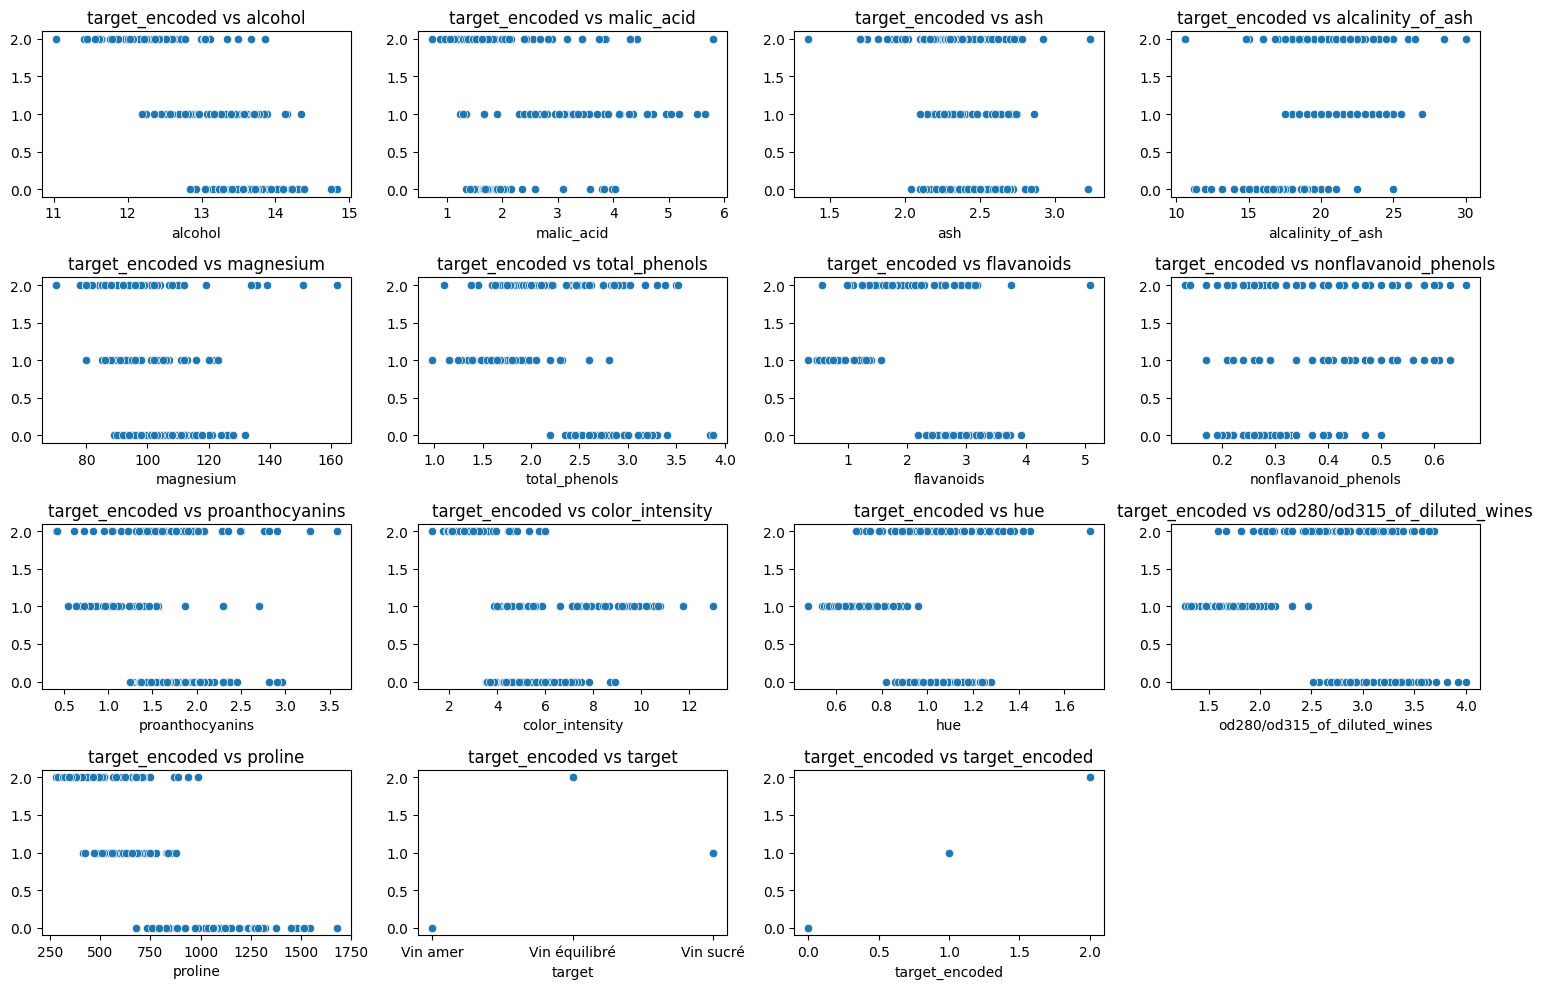

In [28]:
plt.figure(figsize=(15, 10))
# Calculate the number of rows needed based on the number of features
num_rows = (len(df.columns) + 3) // 4  # Round up to the nearest integer
for i, feature in enumerate(df.columns, 1):
    plt.subplot(num_rows, 4, i)  # Adjust the number of rows dynamically
    sns.scatterplot(x=df[feature], y=df['target_encoded'])
    plt.title(f'target_encoded vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('')
plt.tight_layout()
plt.show()

### Split du jeu de donnée pour l'entrainement

# Declaration de target et de futures

In [18]:
X = df.drop('target_encoded', axis=1)
y = df['target_encoded']
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,Vin amer
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,Vin amer
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,Vin amer
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,Vin amer
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,Vin amer


In [19]:
# split du jeu de donnée en train et test
# random state doit etre un int et sert a fixer le jeu de donnée
# test size corespond au pourcentage du jeu de donnée qui sera en test
X_train, X_test, y_train, y_test = train_test_split(
    df[df.columns[:-2]],
    df[df.columns[-2]],
    test_size=0.2,
    random_state=42
    )

### Entrainement du jeu de donnée

In [22]:
# Régression logistique
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

# SVM
model_svm = SVC()
model_svm.fit(X_train, y_train)

# Forêt aléatoire
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

c:\Users\ELite\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier()

### Predictions et probabilités

# Avaluation

In [25]:
from sklearn.metrics import accuracy_score

# 
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print("Précision de la régression logistique :", accuracy_lr)
print("Précision de la SVM :", accuracy_svm)
print("Précision de la forêt aléatoire :", accuracy_rf)


Précision de la régression logistique : 0.9722222222222222
Précision de la SVM : 0.8055555555555556
Précision de la forêt aléatoire : 1.0


In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# 5. Évaluer les performances des modèles
# Régression logistique
print("Métriques pour la régression logistique:")
print("Précision:", accuracy_score(y_test, y_pred_lr))
print("Précision (macro):", precision_score(y_test, y_pred_lr, average='macro'))
print("Rappel (macro):", recall_score(y_test, y_pred_lr, average='macro'))
print("Score F1 (macro):", f1_score(y_test, y_pred_lr, average='macro'))
print("Matrice de confusion:\n", confusion_matrix(y_test, y_pred_lr))
print("Rapport de classification:\n", classification_report(y_test, y_pred_lr))

# SVM
print("\nMétriques pour la SVM:")
print("Précision:", accuracy_score(y_test, y_pred_svm))
print("Précision (macro):", precision_score(y_test, y_pred_svm, average='macro'))
print("Rappel (macro):", recall_score(y_test, y_pred_svm, average='macro'))
print("Score F1 (macro):", f1_score(y_test, y_pred_svm, average='macro'))
print("Matrice de confusion:\n", confusion_matrix(y_test, y_pred_svm))
print("Rapport de classification:\n", classification_report(y_test, y_pred_svm))

# Forêt aléatoire
print("\nMétriques pour la forêt aléatoire:")
print("Précision:", accuracy_score(y_test, y_pred_rf))
print("Précision (macro):", precision_score(y_test, y_pred_rf, average='macro'))
print("Rappel (macro):", recall_score(y_test, y_pred_rf, average='macro'))
print("Score F1 (macro):", f1_score(y_test, y_pred_rf, average='macro'))
print("Matrice de confusion:\n", confusion_matrix(y_test, y_pred_rf))
print("Rapport de classification:\n", classification_report(y_test, y_pred_rf))

Métriques pour la régression logistique:
Précision: 0.9722222222222222
Précision (macro): 0.9777777777777779
Rappel (macro): 0.9761904761904763
Score F1 (macro): 0.9761600681140911
Matrice de confusion:
 [[13  0  1]
 [ 0  8  0]
 [ 0  0 14]]
Rapport de classification:
                precision    recall  f1-score   support

     Vin amer       1.00      0.93      0.96        14
    Vin sucré       1.00      1.00      1.00         8
Vin équilibré       0.93      1.00      0.97        14

     accuracy                           0.97        36
    macro avg       0.98      0.98      0.98        36
 weighted avg       0.97      0.97      0.97        36


Métriques pour la SVM:
Précision: 0.8055555555555556
Précision (macro): 0.7682539682539682
Rappel (macro): 0.7619047619047619
Score F1 (macro): 0.7639846743295019
Matrice de confusion:
 [[14  0  0]
 [ 0  4  4]
 [ 0  3 11]]
Rapport de classification:
                precision    recall  f1-score   support

     Vin amer       1.00      1.00 

# Matrice de confusion


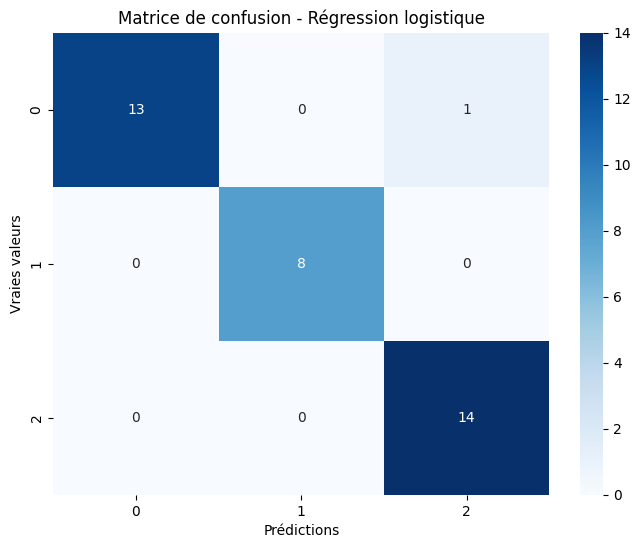

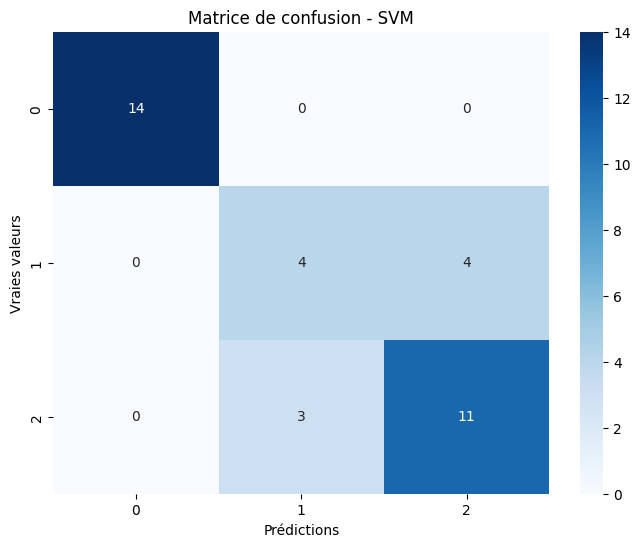

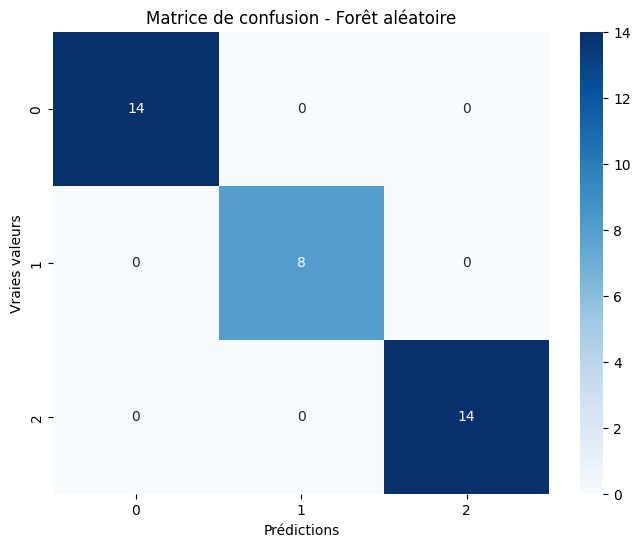

In [27]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ... (Code pour l'entraînement des modèles et les prédictions)

# Matrice de confusion pour la régression logistique
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de confusion - Régression logistique')
plt.xlabel('Prédictions')
plt.ylabel('Vraies valeurs')
plt.show()

# Matrice de confusion pour la SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de confusion - SVM')
plt.xlabel('Prédictions')
plt.ylabel('Vraies valeurs')
plt.show()

# Matrice de confusion pour la forêt aléatoire
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de confusion - Forêt aléatoire')
plt.xlabel('Prédictions')
plt.ylabel('Vraies valeurs')
plt.show()

**Précision (Precision) de 1 :**

La précision est le rapport des vrais positifs (TP) sur la somme des vrais positifs et des faux positifs (FP). Elle mesure la précision du modèle lorsqu'il prédit la classe ciblée.
Une précision de 1 signifie que toutes les prédictions positives faites par le modèle sont correctes. Il n'y a aucun faux positif.


**Rappel (Recall) de 0.49 :**

Le rappel est le rapport des vrais positifs (TP) sur la somme des vrais positifs et des faux négatifs (FN). Il mesure la capacité du modèle à capturer tous les exemples positifs de la classe ciblée.
Un rappel de 0.49 indique que le modèle capture seulement 49% des exemples réels positifs de la classe. Il manque une partie des exemples positifs, ce qui peut être considéré comme un rappel assez faible (environ 1/2).